# Análise de dados e modelagem de diabetes

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [27]:
# Carregar o dataset
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [28]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [29]:
# Apresentar as primeiras linhas do dataset
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [30]:
df_exames.genero.unique()

array(['M', 'F'], dtype=object)

## Tratando os dados
- Remover a coluna 'id_paciente'
- Converter uma variável categorica (genero) em numérica, usando o one-hot-encoding

In [31]:
# Remover a coluna 'id_paciente'
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [32]:
# Converter uma variável categorica (genero) em numérica, usando o one-hot-encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')


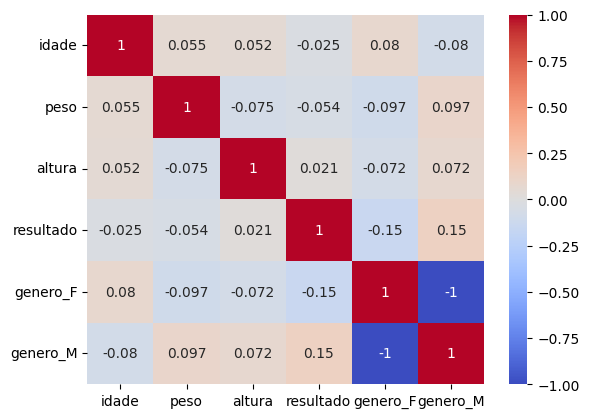

In [33]:
## Verificando a correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

<Axes: >

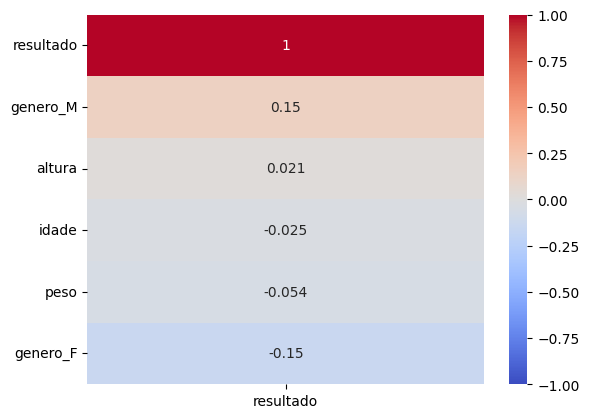

In [34]:
# Mapa de calor da correlação somente com a variável alvo (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

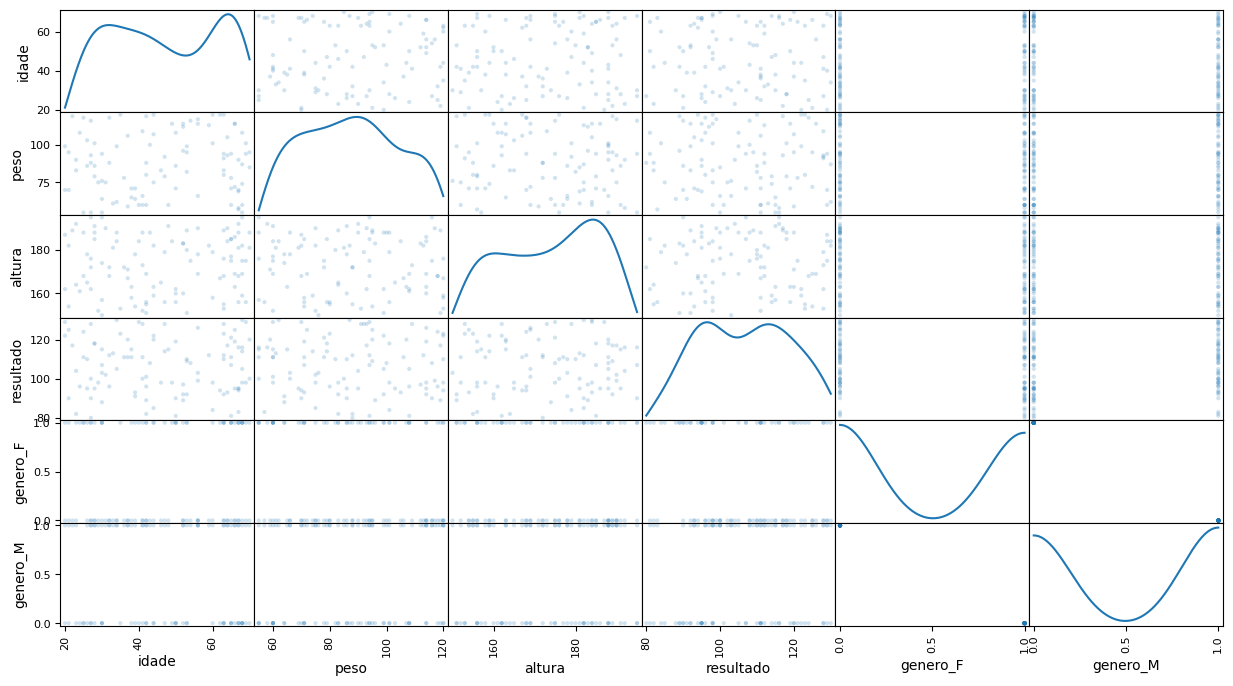

In [35]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, figsize=(15, 8), alpha=0.2, diagonal='kde')
plt.show()

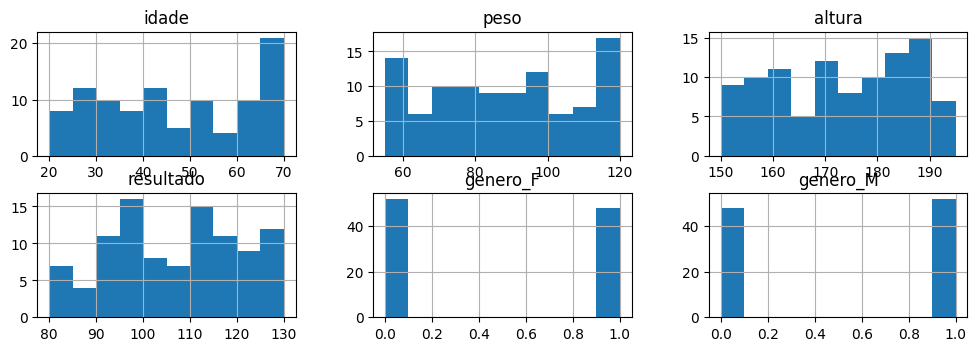

In [36]:
# Histograma de todas as variáveis
df_exames.hist(layout=(5, 3), figsize=(12, 10))
plt.show()


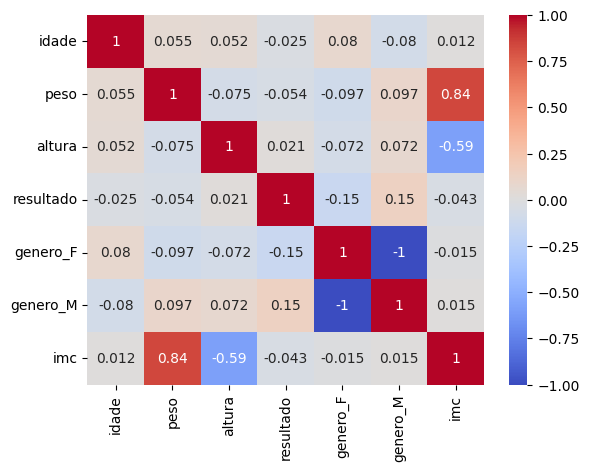

In [37]:
# Criar um feature nova baseada na altura e peso
df_exames['imc'] = df_exames['peso'] / (df_exames['altura'] / 100) ** 2
# Verificar a correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

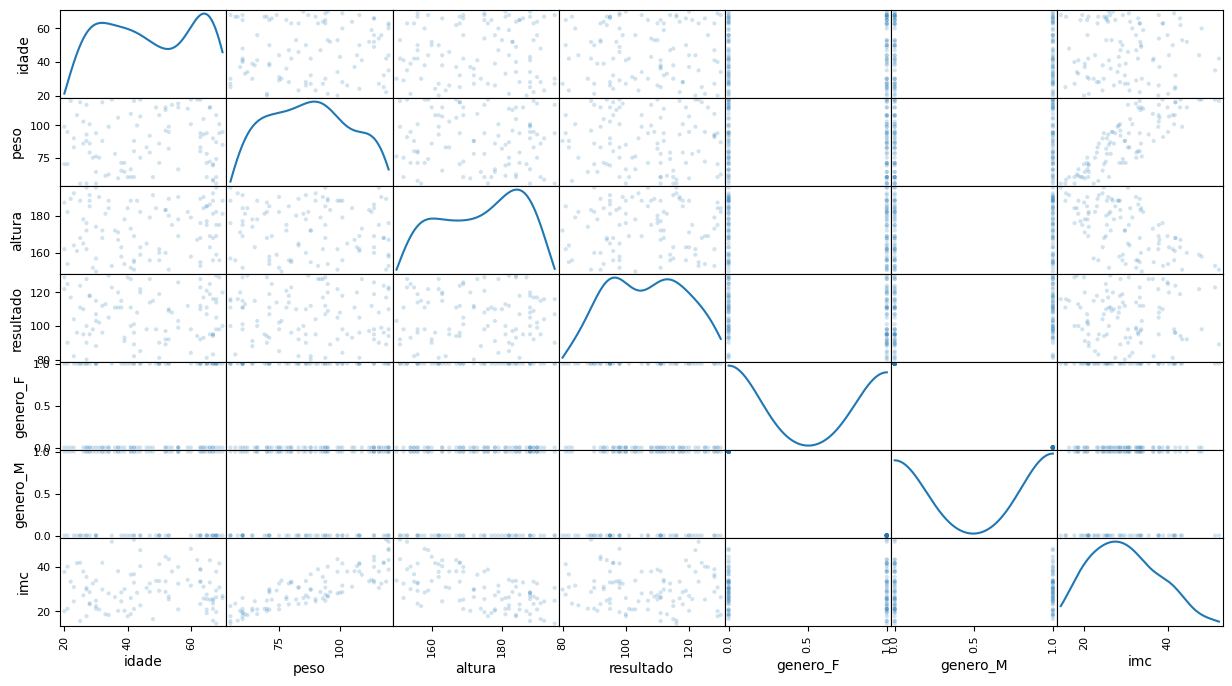

In [38]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, figsize=(15, 8), alpha=0.2, diagonal='kde')
plt.show()

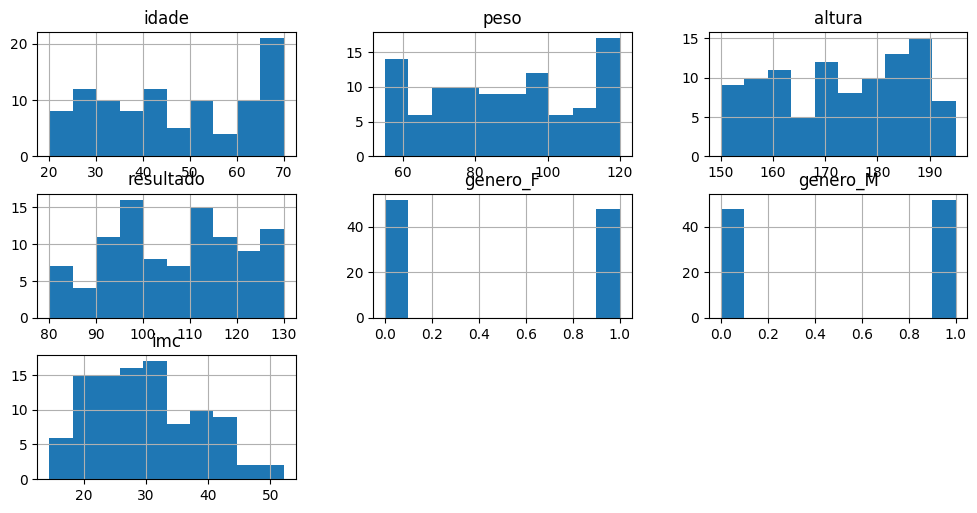

In [39]:
# Histograma de todas as variáveis
df_exames.hist(layout=(5, 3), figsize=(12, 10))
plt.show()

In [40]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [41]:
# Modelo 1 - Sem IMC
# Separar as variáveis independentes (X) e a variável dependente (y)
X_1 = df_exames.drop(columns=['resultado', 'imc'])
y_1 = df_exames['resultado']

In [42]:
# Dividir conjunto entre treino e teste
X_treino_1, X_teste_1, y_treino_1, y_teste_1 = train_test_split(X_1, y_1, test_size=0.7, random_state=42)
# Criar o modelo
modelo_1 = LinearRegression()
# Treinar o modelo
modelo_1.fit(X_treino_1, y_treino_1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
# Fazer previsões com o modelo treinado
y_pred_1 = modelo_1.predict(X_teste_1)
# Calcular métricas de desempenho
mae_1 = mean_absolute_error(y_teste_1, y_pred_1)
r2_1 = modelo_1.score(X_treino_1, y_treino_1)

In [44]:
# Exibir as métricas
print(f'MAE: {mae_1:.2f}')
print(f'R²: {r2_1:.2f}')

MAE: 13.89
R²: 0.17


In [45]:
# Calcular métricas por funções importadas
# Calcular métricas de desempenho
mae_3 = mean_absolute_error(y_teste_1, y_pred_1)
r2_3 = r2_score(y_teste_1, y_pred_1)
# Exibir as métricas
print(f'MAE: {mae_3:.2f}')
print(f'R²: {r2_3:.2f}')

MAE: 13.89
R²: -0.72


In [46]:
# Modelo 2 - Com apenas IMC
# Separar as variáveis independentes (X) e a variável dependente (y)
X_2 = pd.DataFrame(df_exames['imc'])
y_2 = df_exames['resultado']

In [47]:
# Dividir conjunto entre treino e teste
X_treino_2, X_teste_2, y_treino_2, y_teste_2 = train_test_split(X_2, y_2, test_size=0.7, random_state=42)
# Criar o modelo
modelo_2 = LinearRegression()
# Treinar o modelo
modelo_2.fit(X_treino_2, y_treino_2)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
# Fazer previsões com o modelo treinado
y_pred_2 = modelo_2.predict(X_teste_2)
# Calcular métricas de desempenho
mae_2 = mean_absolute_error(y_teste_2, y_pred_2)
r2_2 = modelo_2.score(X_treino_2, y_treino_2)

In [49]:
# Exibir as métricas
print(f'MAE: {mae_2:.2f}')
print(f'R²: {r2_2:.2f}')

MAE: 10.84
R²: 0.00


In [50]:
# Calcular métricas por funções importadas
# Calcular métricas de desempenho
mae_4 = mean_absolute_error(y_teste_2, y_pred_2)
r2_4 = r2_score(y_teste_2, y_pred_2)
# Exibir as métricas
print(f'MAE: {mae_4:.2f}')
print(f'R²: {r2_4:.2f}')

MAE: 10.84
R²: -0.01


Text(0.5, 1.0, 'Reta de Regressão')

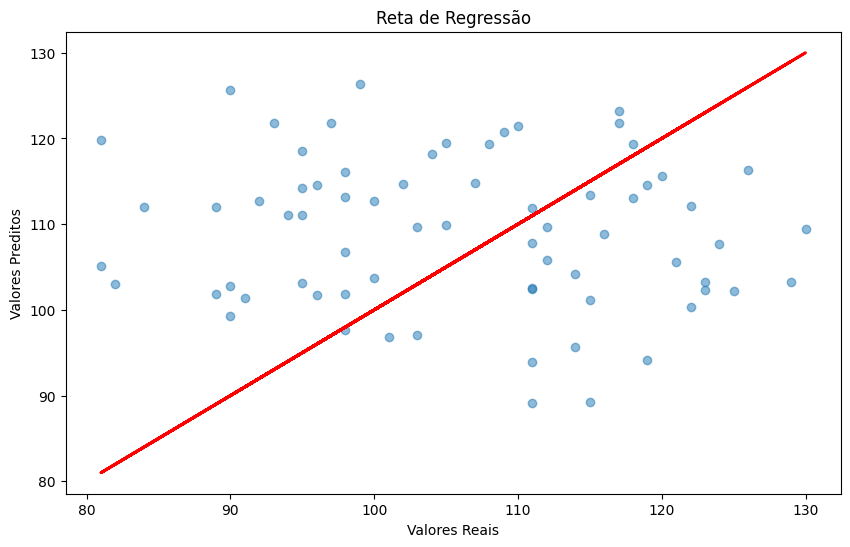

In [51]:
# Mostrar como a reta foi calculada
plt.figure(figsize=(10, 6))
plt.scatter(y_teste_1, y_pred_1, alpha=0.5)
plt.plot(y_teste_1, y_teste_1, color='red', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Reta de Regressão')